# 5.1 Trial 3

### Data Set Up

In [2]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [67]:
# Reconstructed Data with Added Features (123)
aug_data = pd.read_csv("data/training-set-1/pose_data_augmented_res.csv")
Xa = aug_data.iloc[:,5:134]
ya = aug_data['label_encoded'].values

# Reconstructed Data with Improved Added Features(123)
aug_data2 = pd.read_csv("data/training-set-1/pose_data_augmented_res_z.csv")
aug_data2 = aug_data2.loc[:, ~aug_data2.columns.str.contains('_v')] #Removed Visibility Variable
Xa2 = aug_data2.iloc[:,5:134]
ya2 = aug_data2['label_encoded'].values

# Reconstructed Data with Reduced Noise + Improved Features(63)
Xa3 = pd.concat([aug_data2.iloc[:, 5:8], aug_data2.iloc[:, 38:56], aug_data2.iloc[:, 74:92], aug_data2.iloc[:, 104:]],axis=1)

# Just Feature Creations
Xa4 = pd.concat([aug_data2.iloc[:, 5:8], aug_data2.iloc[:, 104:]],axis=1)

# Readable Labels
poses_names = aug_data2['label'].values

#Scaled
scaler = StandardScaler()
Xa_scaled = scaler.fit_transform(Xa)
Xa2_scaled = scaler.fit_transform(Xa2)
Xa3_scaled = scaler.fit_transform(Xa3)
Xa4_scaled = scaler.fit_transform(Xa4)

## 4.1 Cross Validation of Data Augmentation/Features Selection

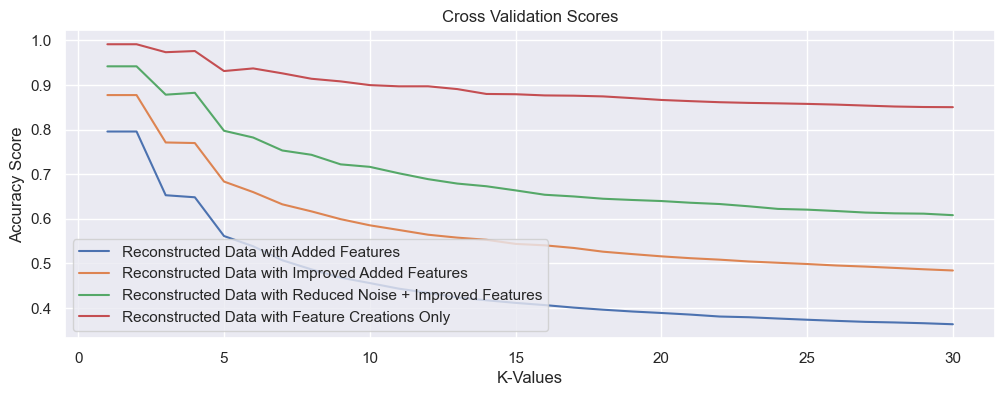

In [68]:
k_values = [i for i in range(1, 31)]

scores_Xa = []
scores_Xa2 = []
scores_Xa3 = []
scores_Xa4 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    
    knn.fit(Xa_scaled, ya)
    score_Xa = cross_val_score(knn, Xa_scaled, ya, cv=10, scoring='accuracy')
    scores_Xa.append(np.mean(score_Xa))
                            
    knn.fit(Xa2_scaled, ya2)
    score_Xa2 = cross_val_score(knn, Xa2_scaled, ya2, cv=10, scoring='accuracy')
    scores_Xa2.append(np.mean(score_Xa2))

    knn.fit(Xa3_scaled, ya2)
    score_Xa3 = cross_val_score(knn, Xa3_scaled, ya2, cv=10, scoring='accuracy')
    scores_Xa3.append(np.mean(score_Xa3))

    knn.fit(Xa4_scaled, ya2)
    score_Xa4 = cross_val_score(knn, Xa4_scaled, ya2, cv=10, scoring='accuracy')
    scores_Xa4.append(np.mean(score_Xa4))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_Xa, label='Reconstructed Data with Added Features')
sns.lineplot(x = k_values, y = scores_Xa2, label='Reconstructed Data with Improved Added Features')
sns.lineplot(x = k_values, y = scores_Xa3, label='Reconstructed Data with Reduced Noise + Improved Features')
sns.lineplot(x = k_values, y = scores_Xa4, label='Reconstructed Data with Feature Creations Only')
plt.title("Cross Validation Scores")
plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')
plt.show()

In [69]:
# Find index of maximum accuracy for reconstructed data with added features
idx_max_Xa = np.argmax(scores_Xa)
optimal_k_Xa = k_values[idx_max_Xa]
max_accuracy_Xa = scores_Xa[idx_max_Xa]

# Find index of maximum accuracy for reconstructed data with improved features
idx_max_Xa2 = np.argmax(scores_Xa2)
optimal_k_Xa2 = k_values[idx_max_Xa2]
max_accuracy_Xa2 = scores_Xa2[idx_max_Xa2]

# Find index of maximum accuracy for reconstructed data with added/removed features
idx_max_Xa3 = np.argmax(scores_Xa3)
optimal_k_Xa3 = k_values[idx_max_Xa3]
max_accuracy_Xa3 = scores_Xa3[idx_max_Xa3]

# Find index of maximum accuracy for reconstructed data with added/removed features
idx_max_Xa4 = np.argmax(scores_Xa4)
optimal_k_Xa4 = k_values[idx_max_Xa4]
max_accuracy_Xa4 = scores_Xa4[idx_max_Xa4]

print(f"Optimal K (Set 1): {optimal_k_Xa} - Maximum Accuracy: {max_accuracy_Xa:.4f}")
print(f"Optimal K (Set 2): {optimal_k_Xa2} - Maximum Accuracy: {max_accuracy_Xa2:.4f}")
print(f"Optimal K (Set 3): {optimal_k_Xa3} - Maximum Accuracy: {max_accuracy_Xa3:.4f}")
print(f"Optimal K (Set 4): {optimal_k_Xa4} - Maximum Accuracy: {max_accuracy_Xa4:.4f}")

Optimal K (Set 1): 1 - Maximum Accuracy: 0.7957
Optimal K (Set 2): 1 - Maximum Accuracy: 0.8774
Optimal K (Set 3): 1 - Maximum Accuracy: 0.9418
Optimal K (Set 4): 1 - Maximum Accuracy: 0.9913


## 4.2 Dimensionality Reduction Methods

Through dimensionality reduction methods, we aim to validate the contribution of features by transforming the data to a space where the most significant variances in PCA and class separability using LDA.

### 4.2.1 Principal Component Analysis

A scree plot analysis is instrumental in understanding the distribution of variance across principal components in high-dimensional data. The "elbow" in the plot typically represents the point beyond which additional components have a diminishing return on explaining the variance.

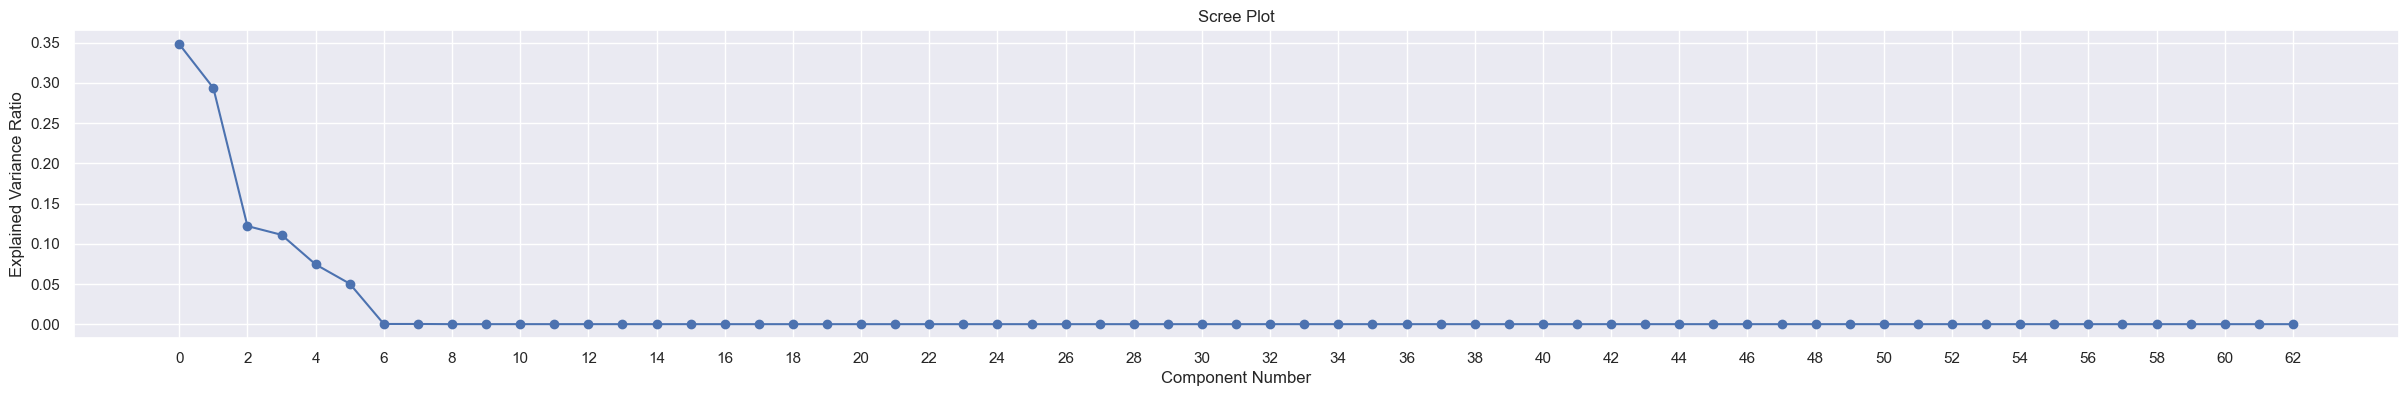

In [309]:
pca = PCA()
Xa_pca = pca.fit_transform(Xa3)

explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_  

sns.set(rc={'figure.figsize':(30,4)})
plt.plot(explained_variance_ratio, marker='o')
plt.xticks(range(len(explained_variance_ratio))[::2])
plt.xlabel("Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

Multiple inflection points were observed between 0-6 before it reaches a flat line.

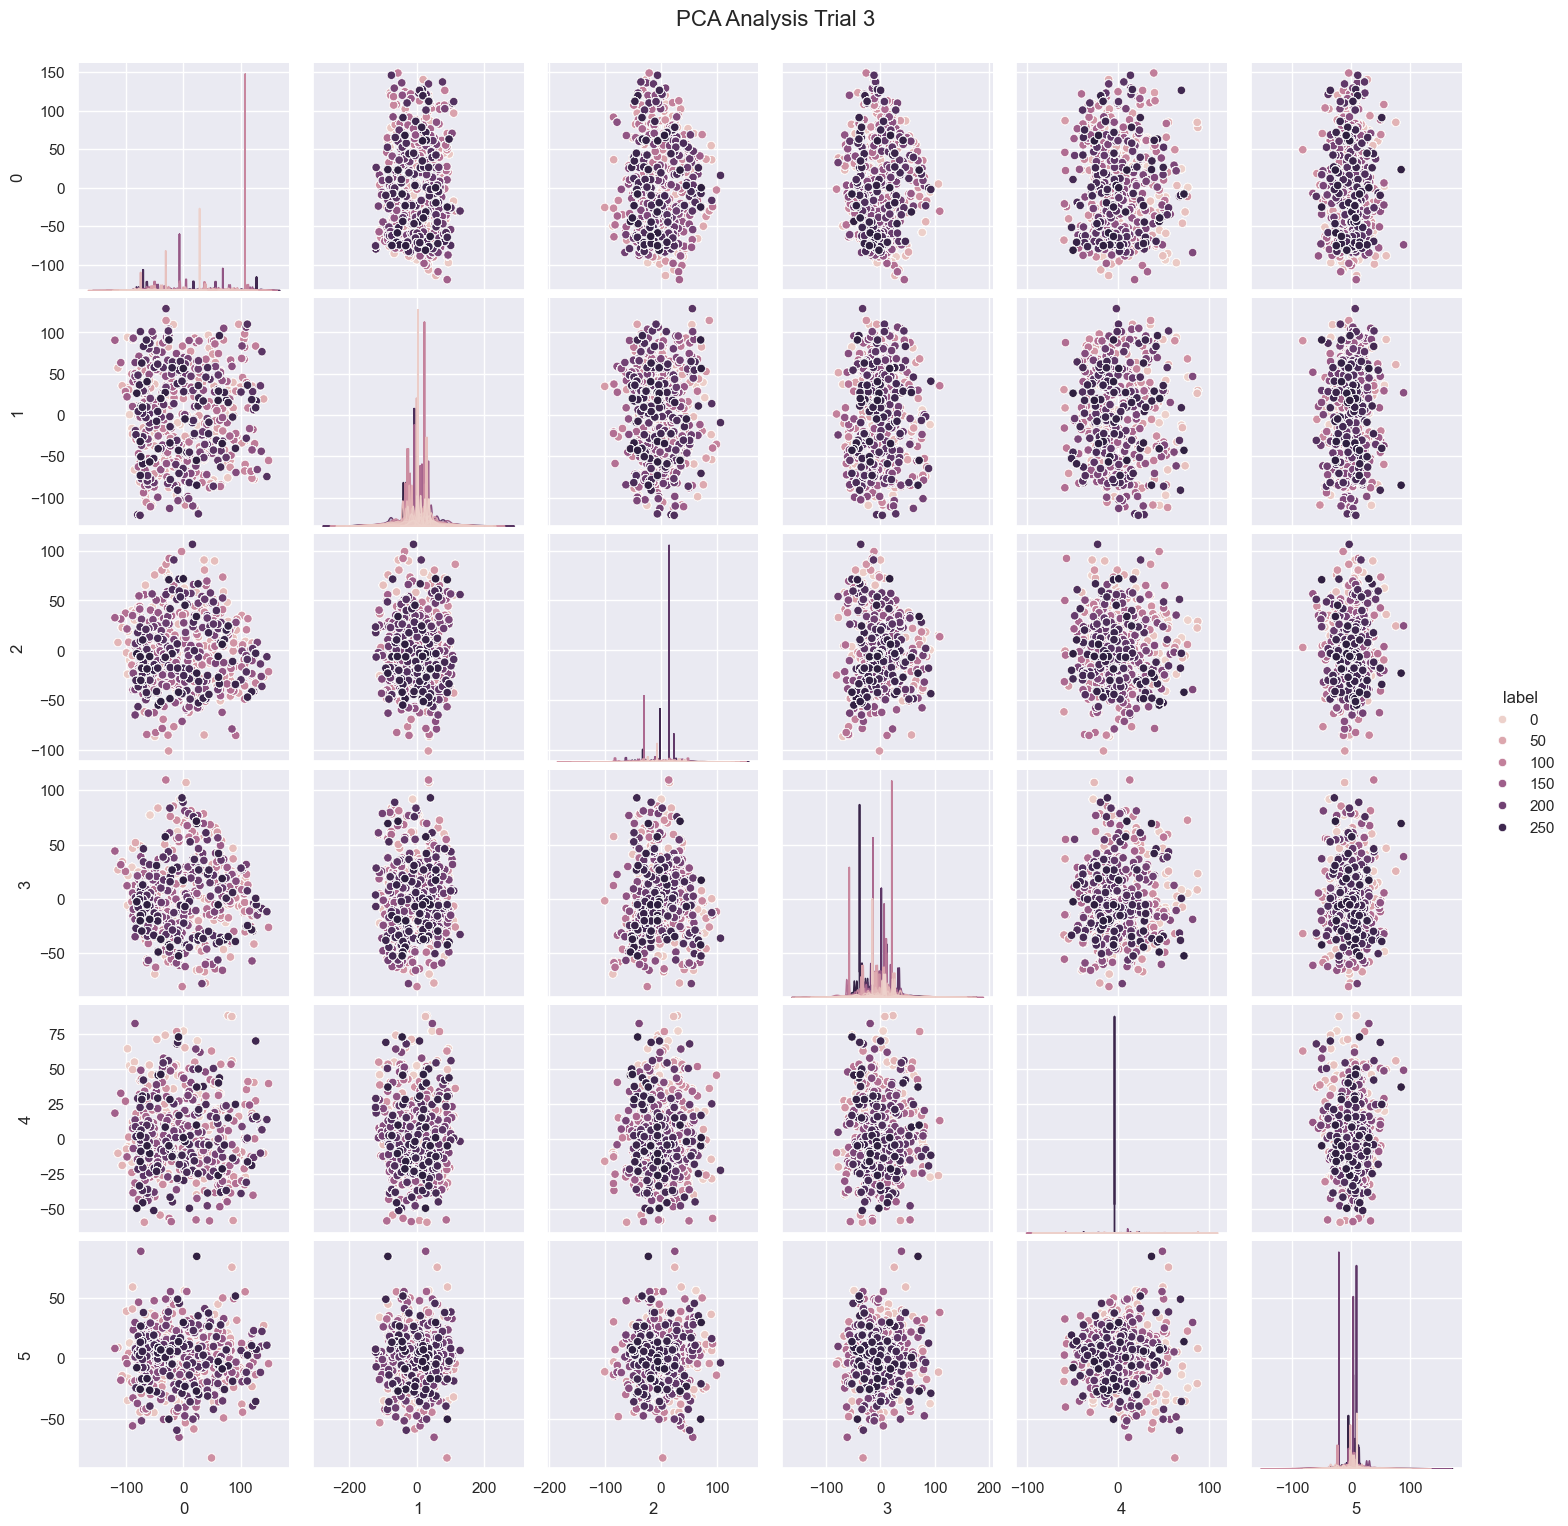

In [310]:
pca = PCA(n_components=6)
Xa_pca = pca.fit_transform(Xa3)
pca_res = pd.DataFrame(data = Xa_pca)
pca_res['label'] = ya

pairplot_fig = sns.pairplot(pca_res, hue='label')
pairplot_fig.fig.suptitle('PCA Analysis Trial 3', size=16, y=1.02)
pairplot_fig.savefig("trial3_feature_validation_pca_pairplot.png")
plt.show()

### 4.2.2 Linear Discriminant Analysis

LDA technique is employed to extract insights into class separability.

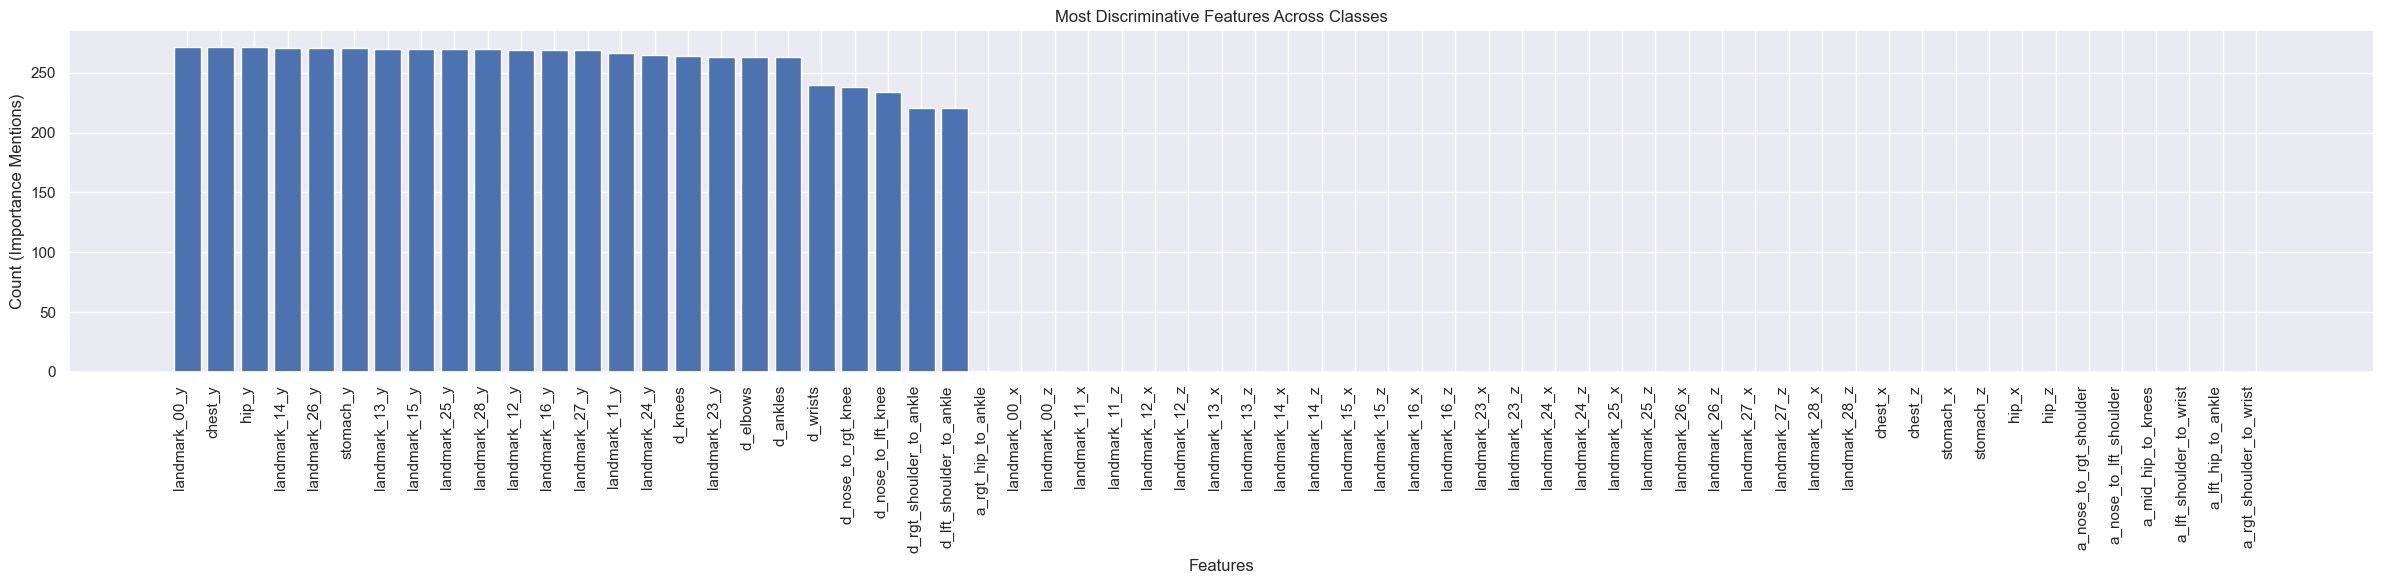

In [335]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(Xa3, ya3)
features = Xa3.columns

n_top_features = 23
feature_counts = {feature: 0 for feature in features}

top_features_per_class = {}
for i in range(lda.coef_.shape[0]):
  sorted_coef_indices = np.argsort(np.abs(lda.coef_[i]))[::-1]
  top_features = [features[j] for j in sorted_coef_indices[:n_top_features]]
  for feature in top_features:
    feature_counts[feature] += 1

  top_features_per_class[i] = top_features

sorted_feature_counts = dict(sorted(feature_counts.items(), key=lambda item: item[1], reverse=True))    
features = list(sorted_feature_counts.keys())
counts = list(sorted_feature_counts.values())

plt.figure(figsize=(24, 6))
plt.bar(features, counts)
plt.xlabel("Features")
plt.ylabel("Count (Importance Mentions)")
plt.title("Most Discriminative Features Across Classes")
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

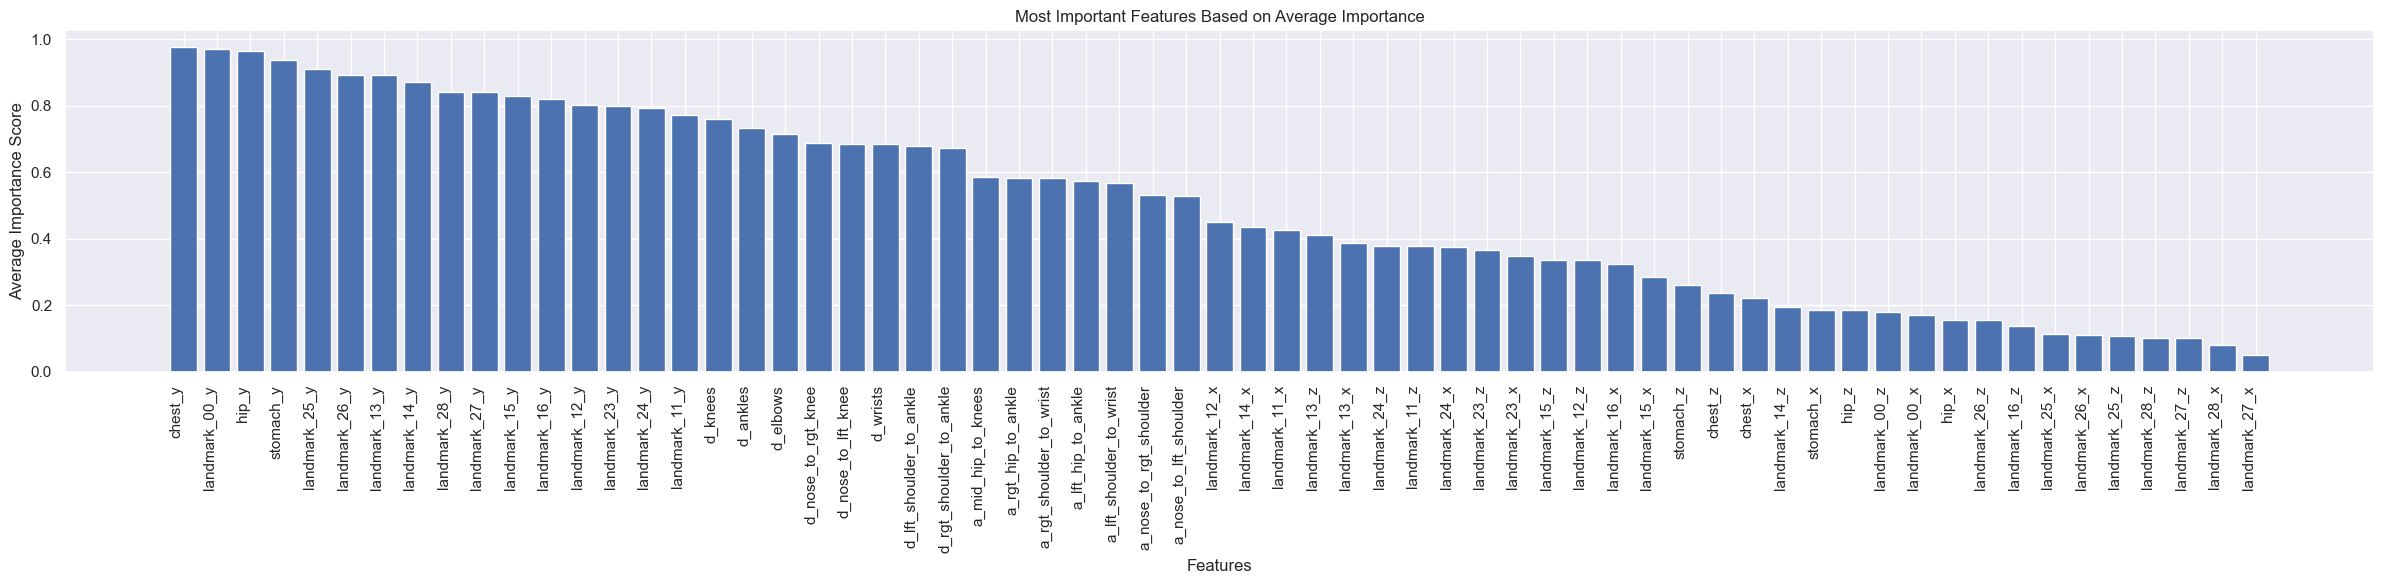

In [342]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(Xa3, ya3)
features = Xa3.columns

total_features = len(Xa3.columns)

# Calculate importance score based on position in the sorted list
feature_importances = {}
for i in range(lda.coef_.shape[0]):
  sorted_coef_indices = np.argsort(np.abs(lda.coef_[i]))[::-1]
  for j, idx in enumerate(sorted_coef_indices):
    feature = features[idx]
    # Importance score based on position (higher position gets higher score)
    score = 1 - (j / (total_features - 1))
    feature_importances[feature] = feature_importances.get(feature, 0) + score

# Sort features and importance scores by average importance
sorted_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))
features = list(sorted_importances.keys())
average_importances = [sorted_importances[f] / len(lda.coef_) for f in features]  # Average importance across classes

plt.figure(figsize=(24, 6))
plt.bar(features, average_importances)
plt.xlabel("Features")
plt.ylabel("Average Importance Score")
plt.title("Most Important Features Based on Average Importance")
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.3 KNN Training and Testing Validation

### 4.3.2 PCA-Reduced KNN Training Validation

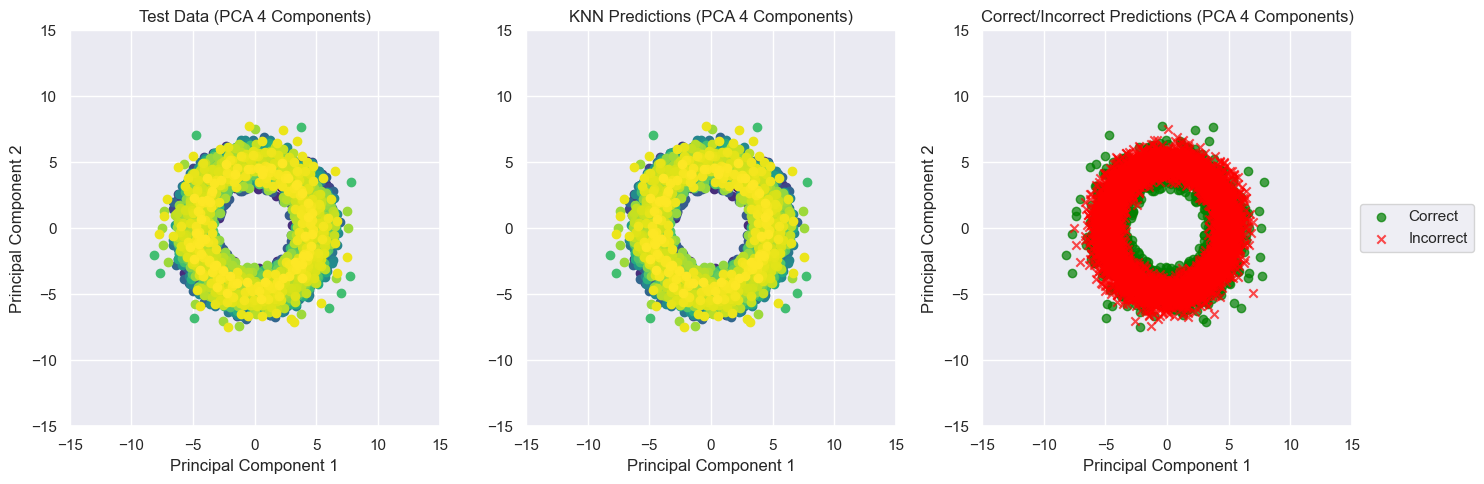

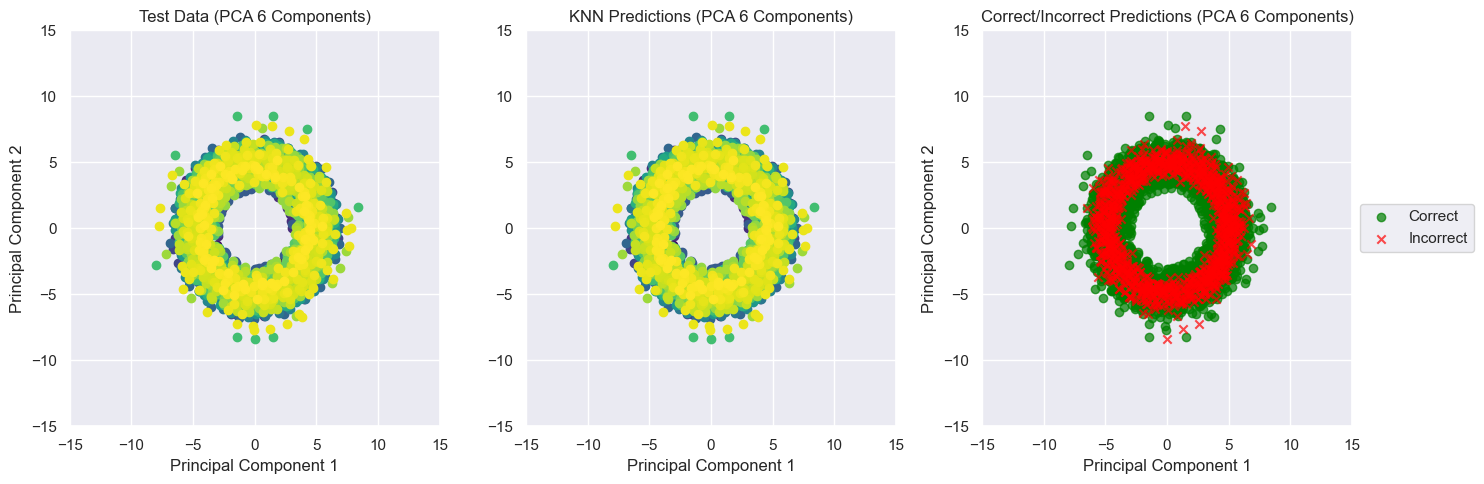

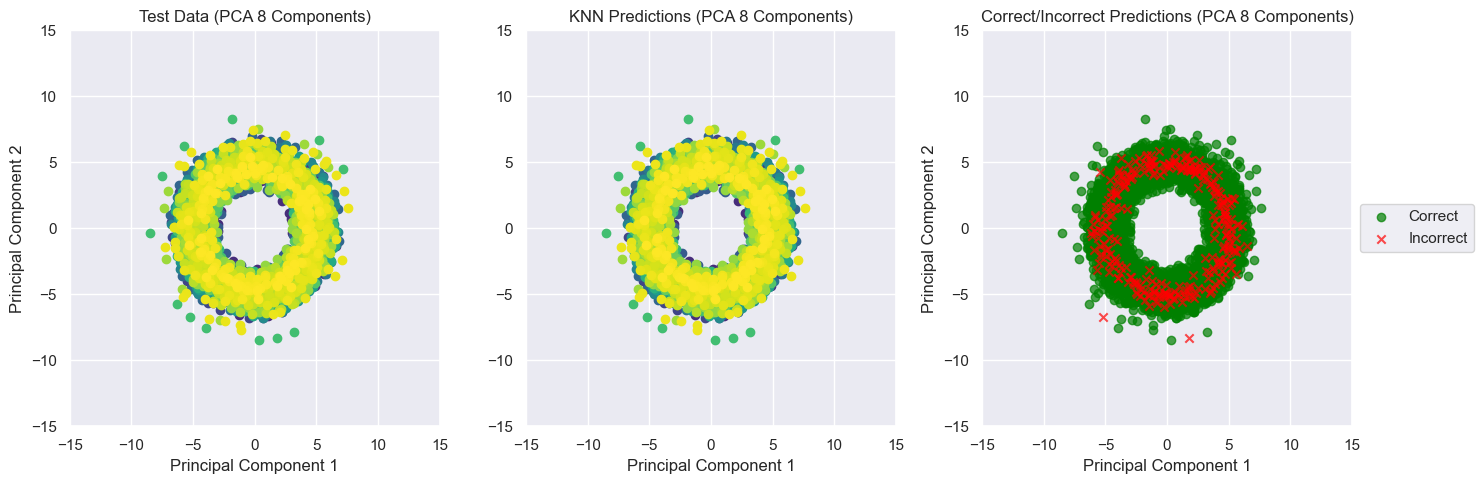

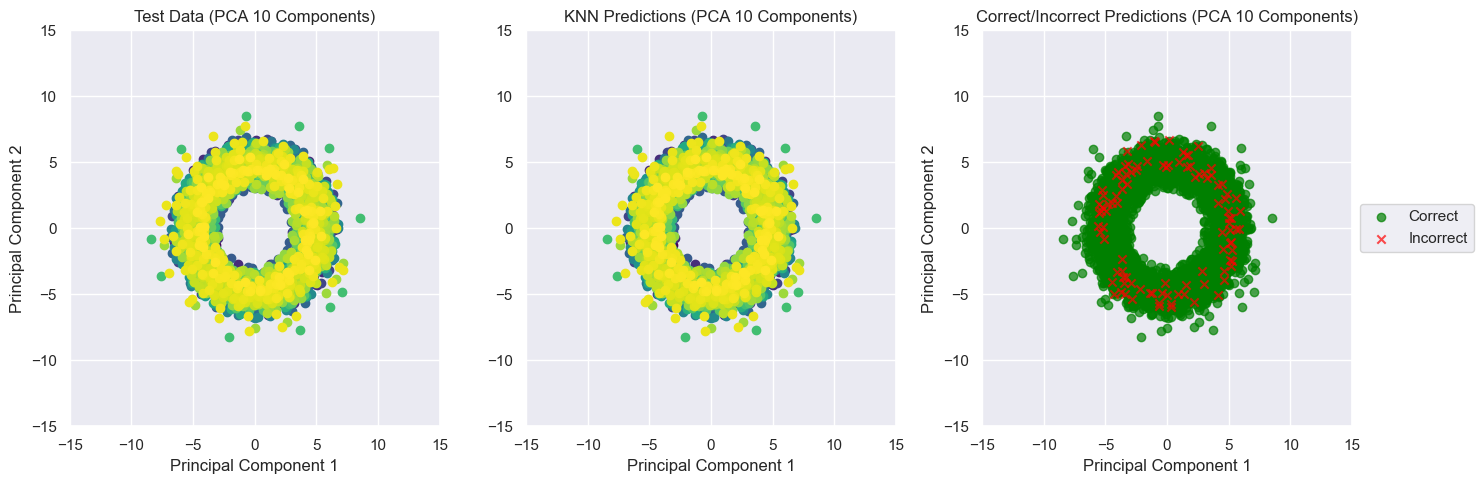

In [319]:
from helpers.pca_pipelines import pca_reduced_knn_training_validation

accuracy1, precision1, recall1, f11, conf_matrix1 = pca_reduced_knn_training_validation(
    Xa3_scaled,ya3,poses_names,n_neighbors=1, n_components=4, test_size=0.3)

accuracy2, precision2, recall2, f12, conf_matrix2 = pca_reduced_knn_training_validation(
    Xa3_scaled,ya3,poses_names,n_neighbors=1, n_components=6, test_size=0.3)

accuracy3, precision3, recall3, f13, conf_matrix3 = pca_reduced_knn_training_validation(
    Xa3_scaled,ya3,poses_names,n_neighbors=1, n_components=8, test_size=0.3)

accuracy4, precision4, recall4, f14, conf_matrix4 = pca_reduced_knn_training_validation(
    Xa3_scaled,ya3,poses_names,n_neighbors=1, n_components=10, test_size=0.3)

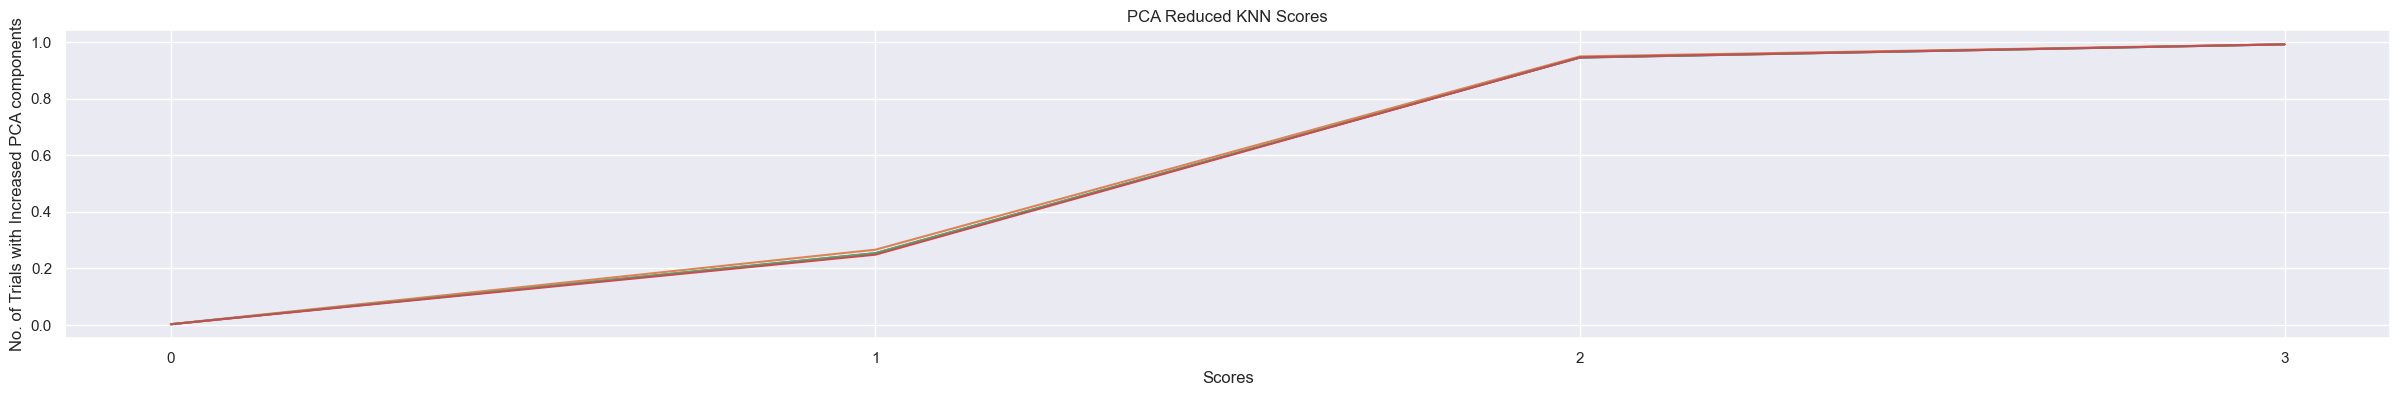

In [318]:
accuracy = [accuracy1,accuracy2,accuracy3,accuracy4]
precision = [precision1,precision2,precision3,precision4]
recall = [recall1,recall2,recall3,recall4]
f1 = [f11,f12,f13,f14]

sns.set(rc={'figure.figsize':(30,4)})
plt.plot(accuracy)
plt.plot(precision)
plt.plot(recall)
plt.plot(f1)
plt.xticks(range(len(accuracy))[::1])
plt.title("PCA Reduced KNN Scores")
plt.xlabel("Scores")
plt.ylabel("No. of Trials with Increased PCA components")
plt.grid(True)
plt.show()

In [320]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: [0.002382573179033356, 0.25357385976855, 0.9452008168822328, 0.992001361470388]
Precision: [0.002609174547561971, 0.26599483296957294, 0.9494952776144603, 0.9924160080872372]
Recall: [0.0023714031066972246, 0.25374013241660304, 0.9453940667175962, 0.9919786096256684]
F1 Score: [0.0023637543252595155, 0.24839545606273095, 0.9460667759197295, 0.9919754387188504]


In [321]:
print(f"Accuracy: {accuracy3}")
print(f"Precision: {precision3}")
print(f"Recall: {recall3}")
print(f"F1 Score: {f13}")

Accuracy: 0.9497957794417972
Precision: 0.952448581988897
Recall: 0.9498265215176979
F1 Score: 0.9502781397190626


### 4.3.2 LDA-Reduced KNN Training Validation

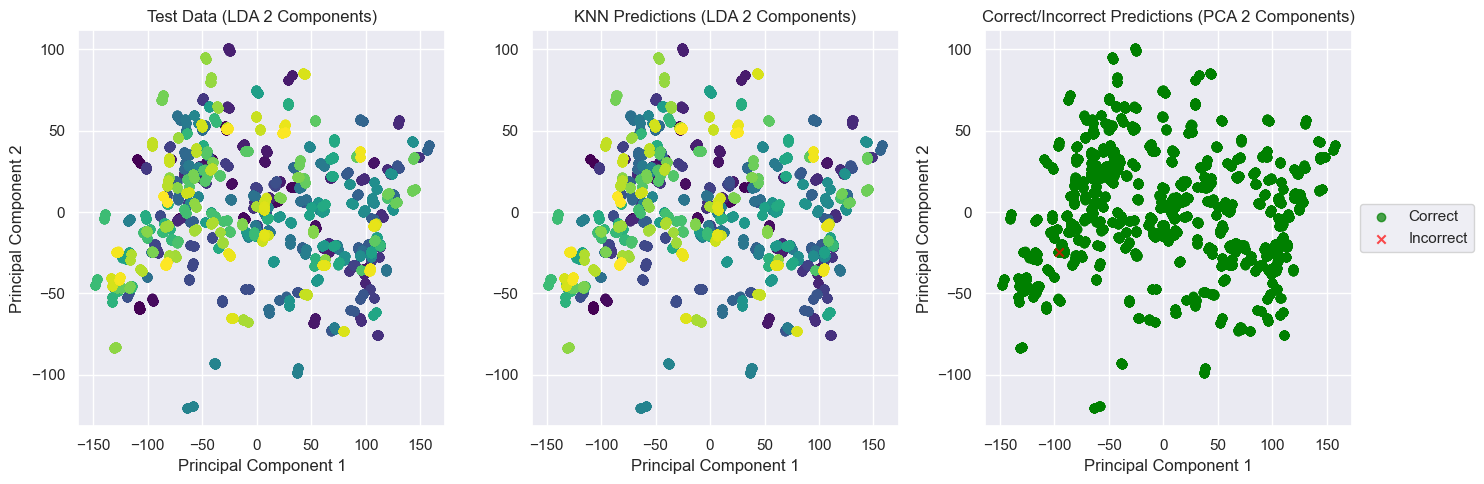

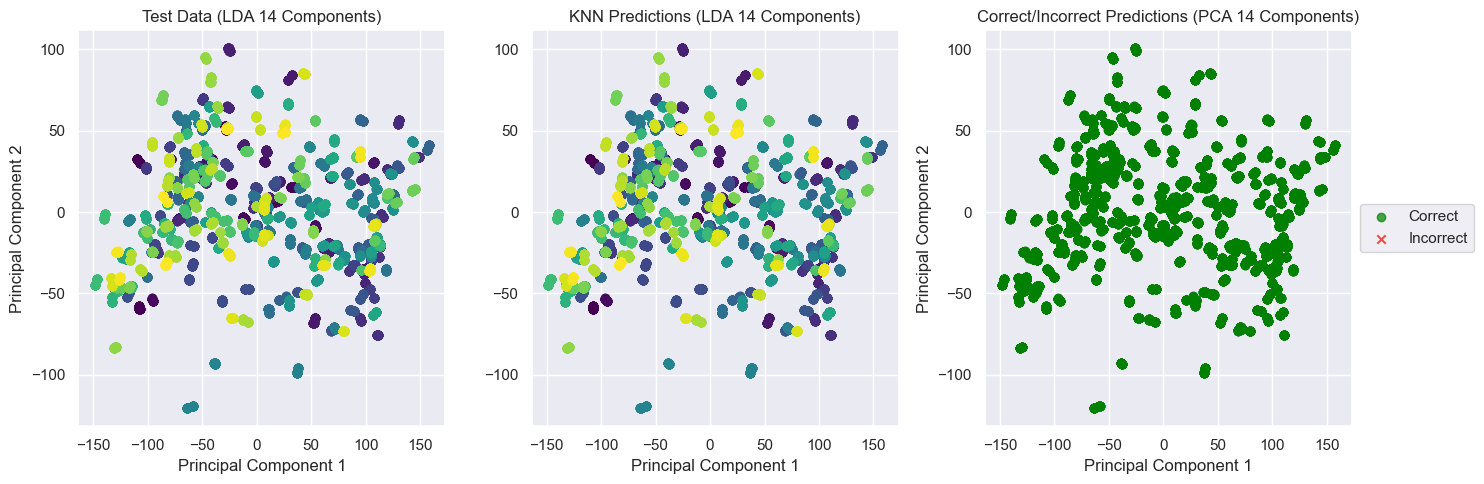

In [345]:
def lda_reduced_knn_training_validation(X,y,poses_names,n_neighbors=1, n_components=1, test_size=0.3):
    unique_poses = np.unique(poses_names)
    color_values = cm.viridis(np.linspace(0, 1, num=len(unique_poses)))

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test, pose_names_train, pose_names_test = train_test_split(
        X_scaled, y, poses_names, stratify=y, test_size=test_size, random_state=42)
    
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train,y_train)
    X_test_lda = lda.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    model.fit(X_train_lda, y_train)

    y_pred = model.predict(X_test_lda)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, pose in enumerate(unique_poses):
        idx = pose_names_test == pose
        axes[0].scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], color=color_values[i], label=pose)
    axes[0].set_title(f'Test Data (LDA {n_components} Components)')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].grid(True)
    #axes[0].set_xlim([-10, 10])
    #axes[0].set_ylim([-10, 10])

    # Predictions Plot
    for i, pose in enumerate(unique_poses):
        idx = pose_names_test == pose
        axes[1].scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], color=color_values[i], label=pose)
    axes[1].set_title(f'KNN Predictions (LDA {n_components} Components)')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].grid(True)
    #axes[1].set_xlim([-10, 10])
    #axes[1].set_ylim([-10, 10])

    # True Labels Plot
    correct = y_pred == y_test
    incorrect = ~correct
    axes[2].scatter(X_test_lda[correct, 0], X_test_lda[correct, 1], c='green', marker='o', alpha=0.7, label='Correct')
    axes[2].scatter(X_test_lda[incorrect, 0], X_test_lda[incorrect, 1], c='red', marker='x', alpha=0.7, label='Incorrect')
    axes[2].set_title(f'Correct/Incorrect Predictions (PCA {n_components} Components)')
    axes[2].set_xlabel('Principal Component 1')
    axes[2].set_ylabel('Principal Component 2')
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[2].grid(True)
    #axes[2].set_xlim([-10, 10])
    #axes[2].set_ylim([-10, 10])    
    
    if len(unique_poses) < 6:
        axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize='small', ncol=2)
        
    plt.tight_layout()
    plt.show()
    return accuracy, precision, recall, f1, conf_matrix

lda_reduced_knn_training_validation

accuracy1, precision1, recall1, f11, conf_matrix1 = lda_reduced_knn_training_validation(
    Xa3_scaled,ya,poses_names,n_neighbors=1, n_components=2, test_size=0.5)

accuracy2, precision2, recall2, f12, conf_matrix2 = lda_reduced_knn_training_validation(
    Xa3_scaled,ya,poses_names,n_neighbors=1, n_components=14, test_size=0.5)

### 4.3.3 KNN Test Data Validation

For this test case, we compiled 5 videos of "fireman spins". Therefore, expected labels should be:
- transition to fireman spin: pole walk
- fireman spin: fireman spin knee hold, fireman one feet up, fireman seat

In [71]:
test_data = pd.read_csv('data/testing-set-1/processed/test-fireman-spin/pose_data_res.csv')
test_data = test_data.loc[:, ~test_data.columns.str.contains('_v')] #Removed Visibility Variable

# Test Data using 123 Features
Xt1 = test_data.iloc[:,3:]

# Test Data using 63 Features
Xt2 = pd.concat([test_data.iloc[:, 3:6], test_data.iloc[:, 36:54], test_data.iloc[:, 72:90], test_data.iloc[:, 102:]],axis=1)

# Test Data using 27 Features
Xt3 = pd.concat([test_data.iloc[:, 3:6], test_data.iloc[:, 102:]],axis=1)

from sklearn.neighbors import KNeighborsClassifier

# Model Training
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
model.fit(Xa2, poses_names)

# Prediction
y_pred = model.predict(Xt1)
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

### Validation with Feature Set 1

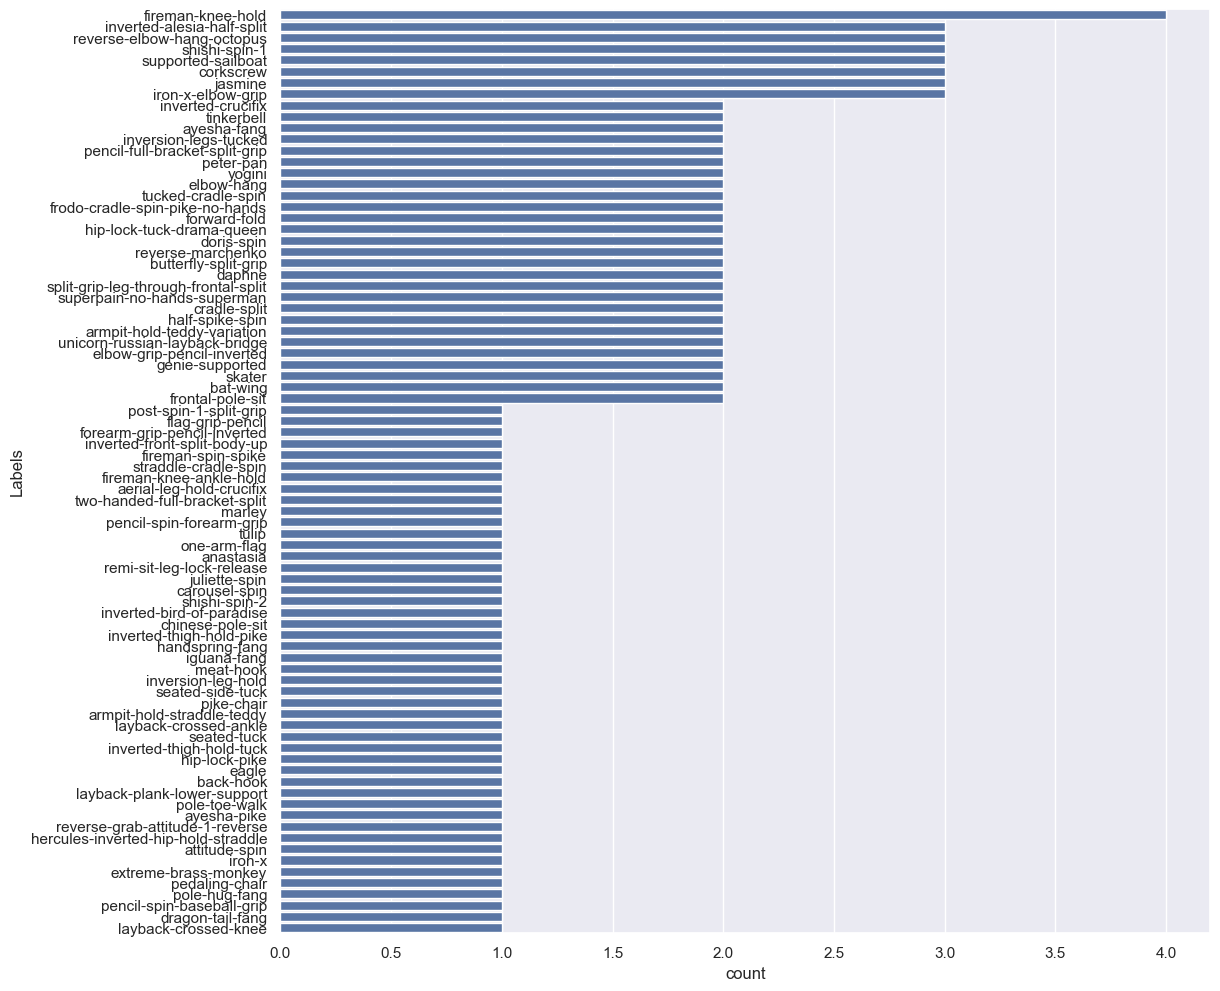

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Model Training
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
model.fit(Xa2, poses_names)

# Prediction
y_pred = model.predict(Xt1)
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

### PCA-Reduced KNN Classification

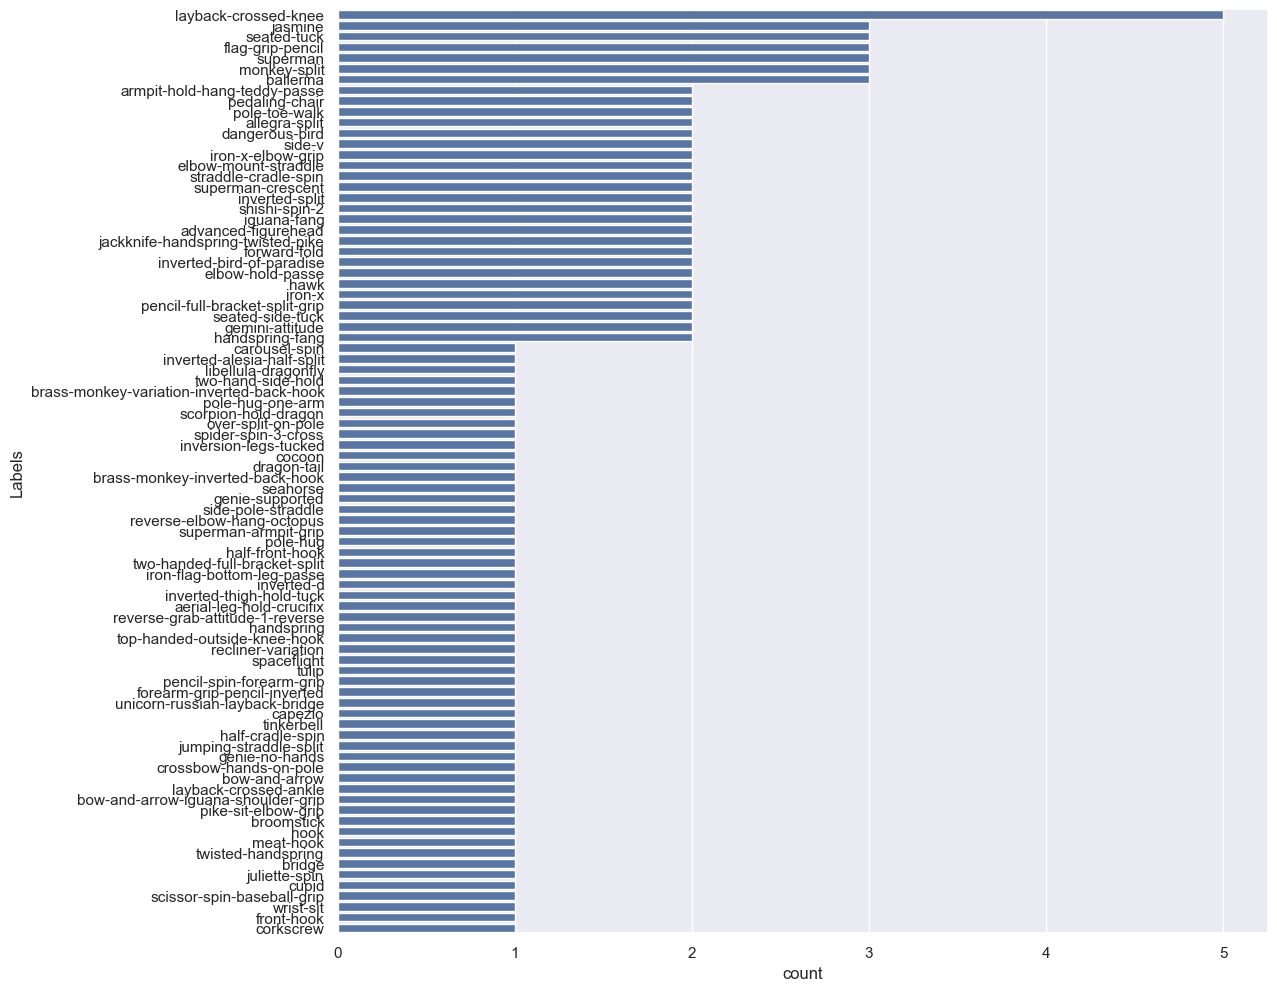

In [32]:
# Model Training
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(Xa2)
X_test_pca = pca.fit_transform(Xt1)
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
model.fit(X_train_pca, poses_names)

# Prediction
y_pred = model.predict(X_test_pca)
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

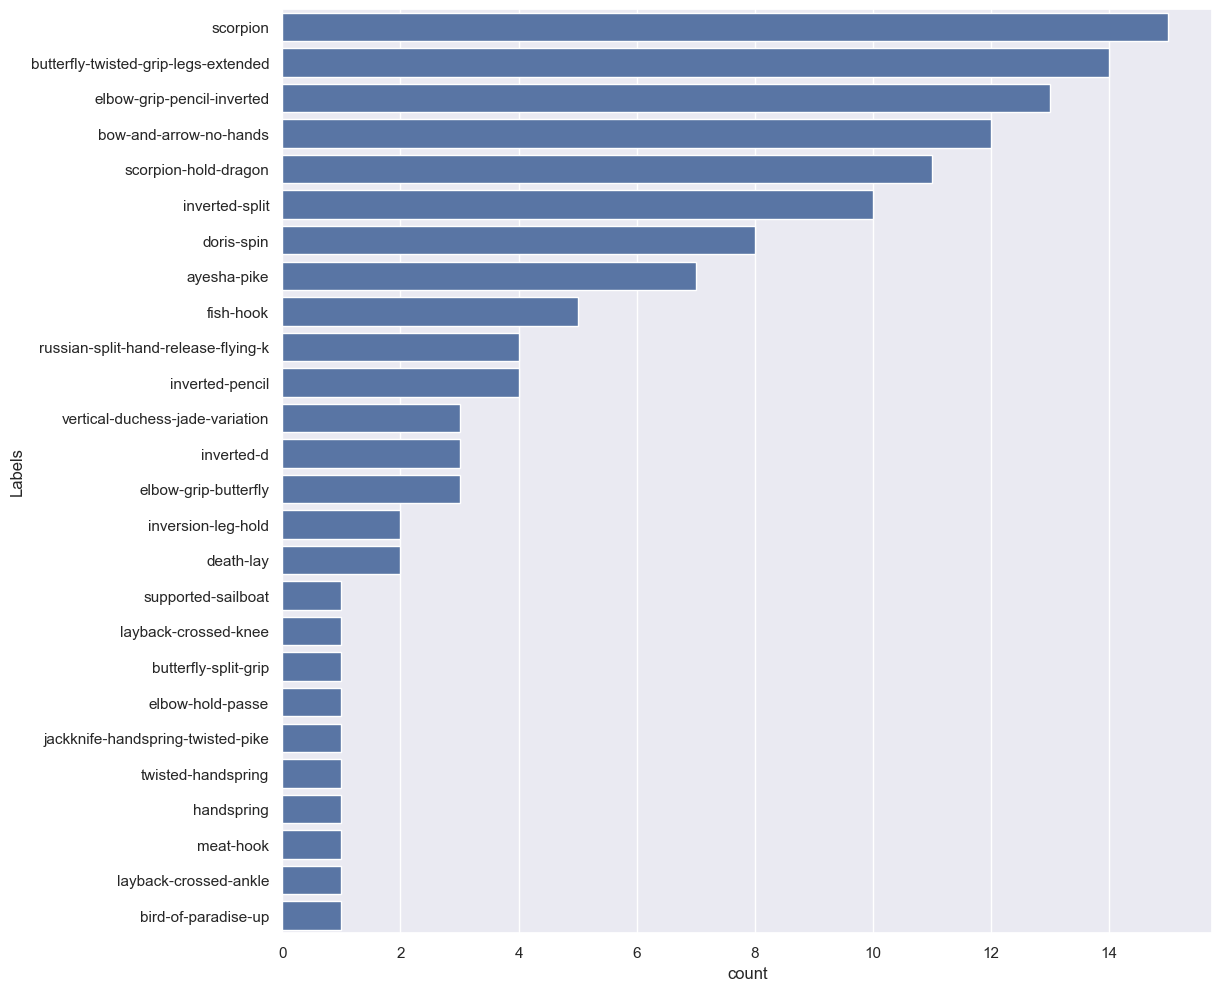

In [58]:
# Model Training
lda = LinearDiscriminantAnalysis(n_components=8)
X_train_lda = lda.fit_transform(Xa2,poses_names)
X_test_lda = lda.transform(Xt1)
model = KNeighborsClassifier(n_neighbors=1, weights='distance')
model.fit(X_train_lda, poses_names)
y_pred = model.predict(X_test_lda)
# Prediction
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

### Validation with Feature Set 2

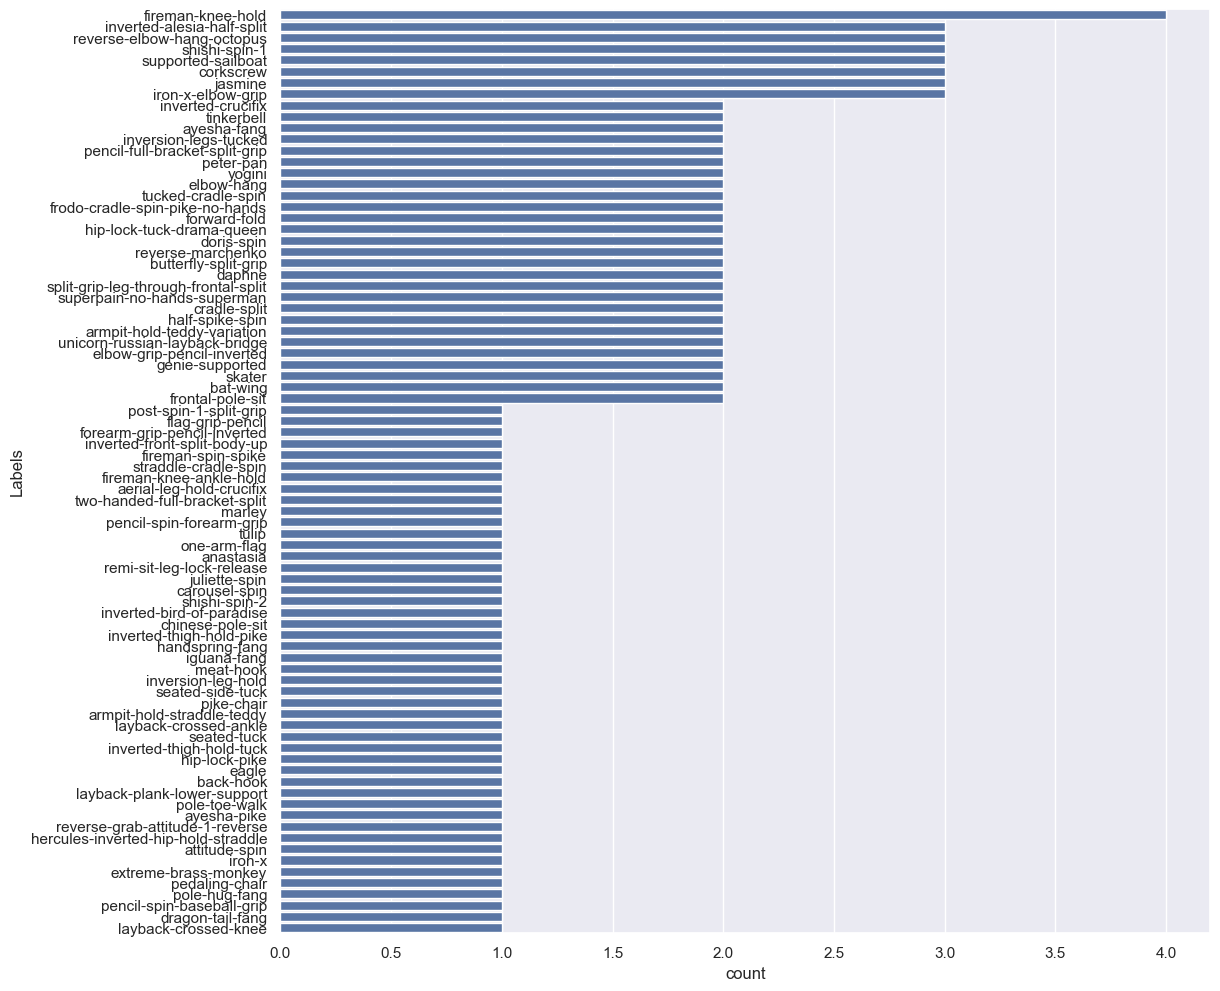

In [40]:
# Model Training
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
model.fit(Xa3, poses_names)

# Prediction
y_pred = model.predict(Xt2)
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

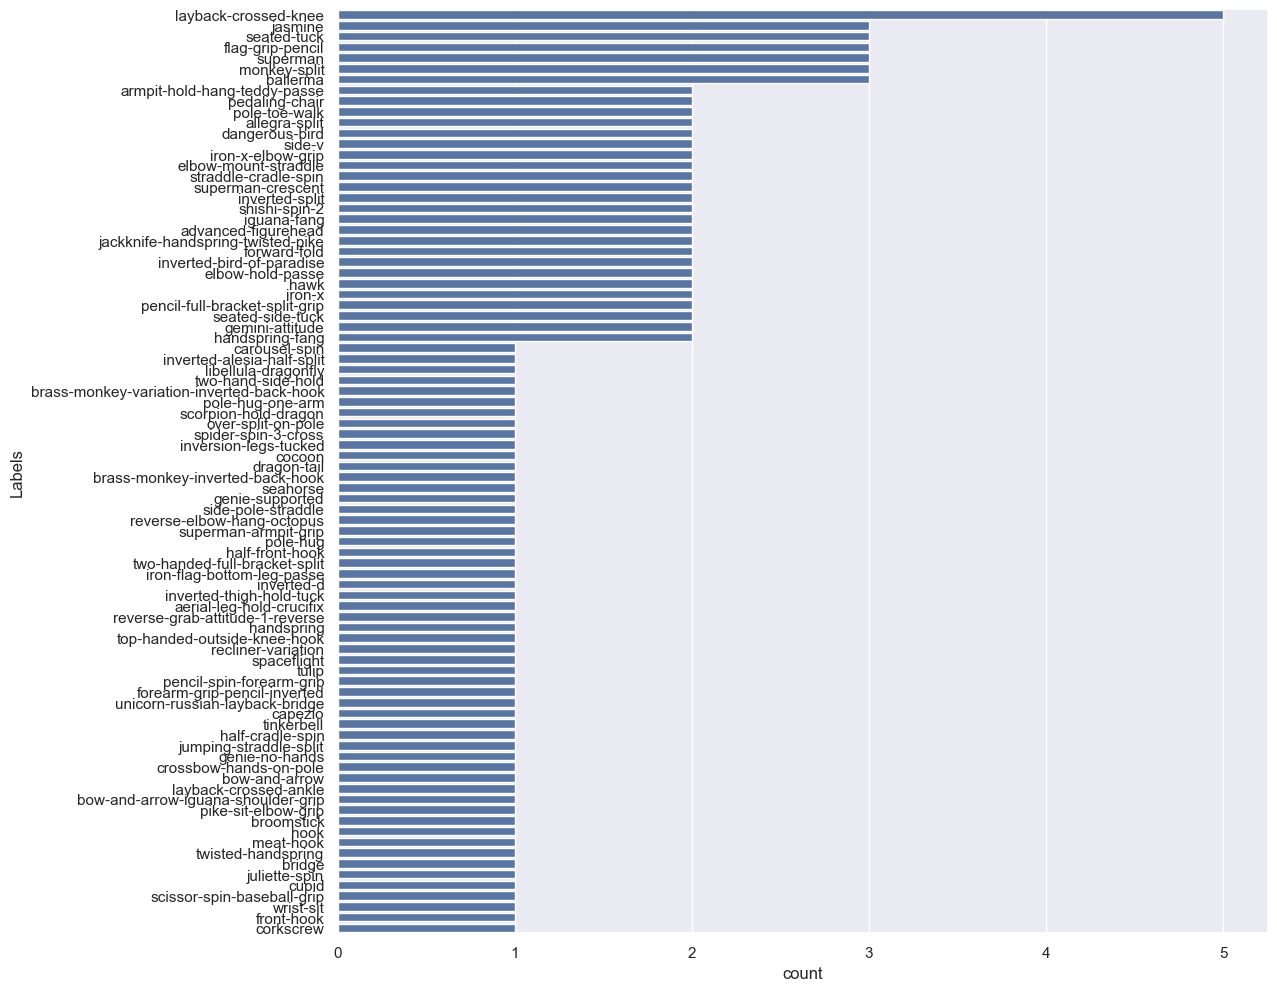

In [41]:
# Model Training
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(Xa3)
X_test_pca = pca.fit_transform(Xt2)
model = KNeighborsClassifier(n_neighbors=30, metric='minkowski', weights='uniform', algorithm='kd_tree')
model.fit(X_train_pca, poses_names)

# Prediction
y_pred = model.predict(X_test_pca)
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

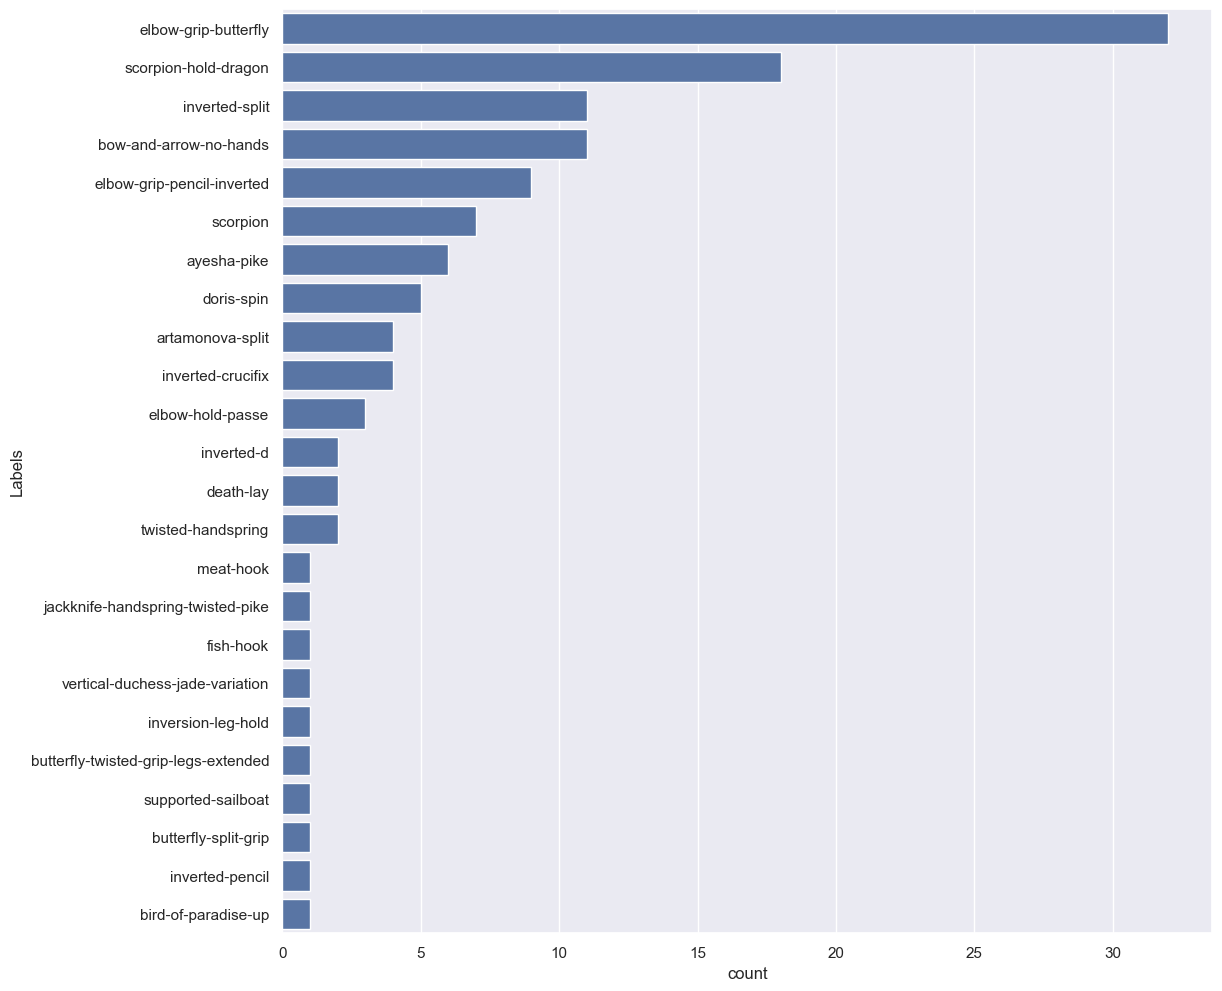

In [57]:
# Model Training
lda = LinearDiscriminantAnalysis(n_components=8)
X_train_lda = lda.fit_transform(Xa3,poses_names)
X_test_lda = lda.transform(Xt2)
model = KNeighborsClassifier(n_neighbors=1, weights='distance')
model.fit(X_train_lda, poses_names)
y_pred = model.predict(X_test_lda)
# Prediction
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

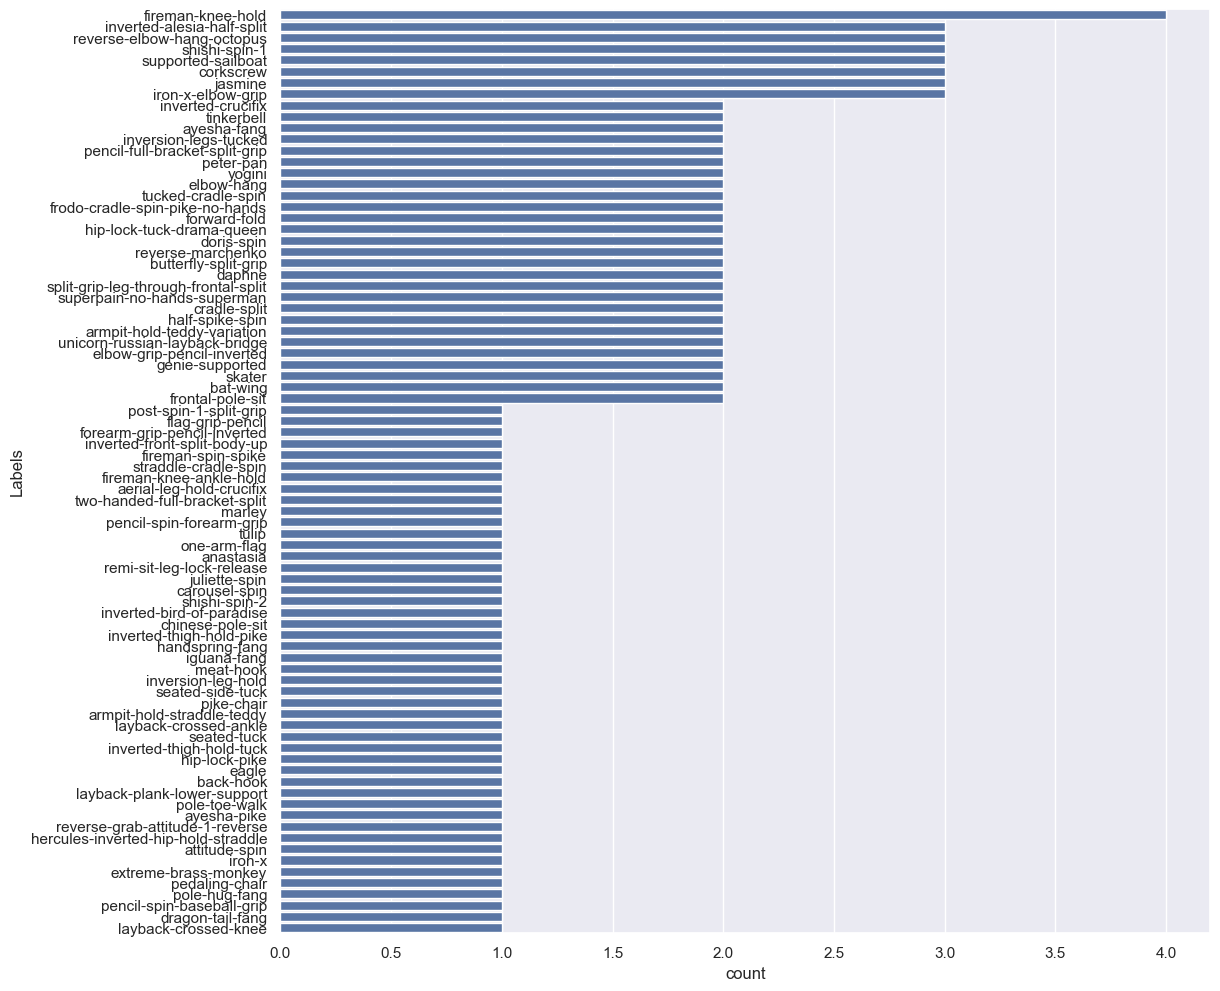

In [72]:
# Model Training
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
model.fit(Xa4, poses_names)

# Prediction
y_pred = model.predict(Xt3)
df_y_pred = pd.DataFrame(y_pred, columns=['Labels'])
sns.set_theme()
plt.figure(figsize=(12, 12))
sns.countplot(data=df_y_pred, y='Labels', order = df_y_pred['Labels'].value_counts().index)
plt.show()

## 4.4 Side Experiment: Similar Pose Classes using LDA

The results from training and validating the KNN model on the LDA-reduced dataset were similar to previous trials. In this experiment, we aim to identify classes that appear inseparable to determine which features might effectively distinguish them.

In [347]:
from scipy.spatial.distance import pdist, squareform

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(Xa3_scaled,ya3)
results = pd.DataFrame(X_lda, columns=['lda'])
results['label'] = poses_names
results = results.groupby('label')['lda'].mean().reset_index()

labels = results['label']
distances = pd.DataFrame(np.zeros((len(labels), len(labels))), columns=labels, index=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        distances.iloc[i, j] = abs(results.iloc[i]['lda'] - results.iloc[j]['lda'])

distances

label                     advanced-figurehead  aerial-leg-hold-crucifix  \
label                                                                     
advanced-figurehead                  0.000000                  0.533322   
aerial-leg-hold-crucifix             0.533322                  0.000000   
air-walk                            37.206815                 36.673493   
alesia-half-split                   79.994620                 79.461297   
allegra                            141.326929                140.793607   
...                                       ...                       ...   
vortex-front                        17.896078                 18.429400   
windmill-spin                       81.472757                 80.939434   
wrist-sit                          132.902850                132.369528   
yogini                              24.278865                 23.745543   
yogini-twisted                      25.374286                 24.840964   

label                       air-walk  alesia-half-split     allegra  \
label                                                                 
advanced-figurehead        37.206815          79.994620  141.326929   
aerial-leg-hold-crucifix   36.673493          79.461297  140.793607   
air-walk                    0.000000          42.787805  104.120115   
alesia-half-split          42.787805           0.000000   61.332310   
allegra                   104.120115          61.332310    0.000000   
...                              ...                ...         ...   
vortex-front               55.102893          97.890698  159.223007   
windmill-spin              44.265942           1.478137   59.854173   
wrist-sit                  95.696036          52.908231    8.424079   
yogini                     12.927950          55.715755  117.048064   
yogini-twisted             11.832529          54.620333  115.952643   

label                     allegra-split  anastasia  apprentice  \
label                                                            
advanced-figurehead          126.614882  66.681911   96.851200   
aerial-leg-hold-crucifix     126.081560  66.148589   96.317878   
air-walk                      89.408068  29.475096   59.644385   
alesia-half-split             46.620263  13.312709   16.856580   
allegra                       14.712047  74.645018   44.475730   
...                                 ...        ...         ...   
vortex-front                 144.510960  84.577989  114.747278   
windmill-spin                 45.142126  14.790845   15.378443   
wrist-sit                      6.287968  66.220939   36.051651   
yogini                       102.336017  42.403046   72.572335   
yogini-twisted               101.240596  41.307625   71.476914   

label                     armpit-hold-hang-teddy-passe  \
label                                                    
advanced-figurehead                          12.486010   
aerial-leg-hold-crucifix                     11.952688   
air-walk                                     24.720805   
alesia-half-split                            67.508610   
allegra                                     128.840919   
...                                                ...   
vortex-front                                 30.382088   
windmill-spin                                68.986747   
wrist-sit                                   120.416840   
yogini                                       11.792855   
yogini-twisted                               12.888276   

label                     armpit-hold-pike-teddy-pike  ...  \
label                                                  ...   
advanced-figurehead                         85.209447  ...   
aerial-leg-hold-crucifix                    84.676125  ...   
air-walk                                    48.002632  ...   
alesia-half-split                            5.214827  ...   
allegra                                     56.117483  ...   
...                                               ..

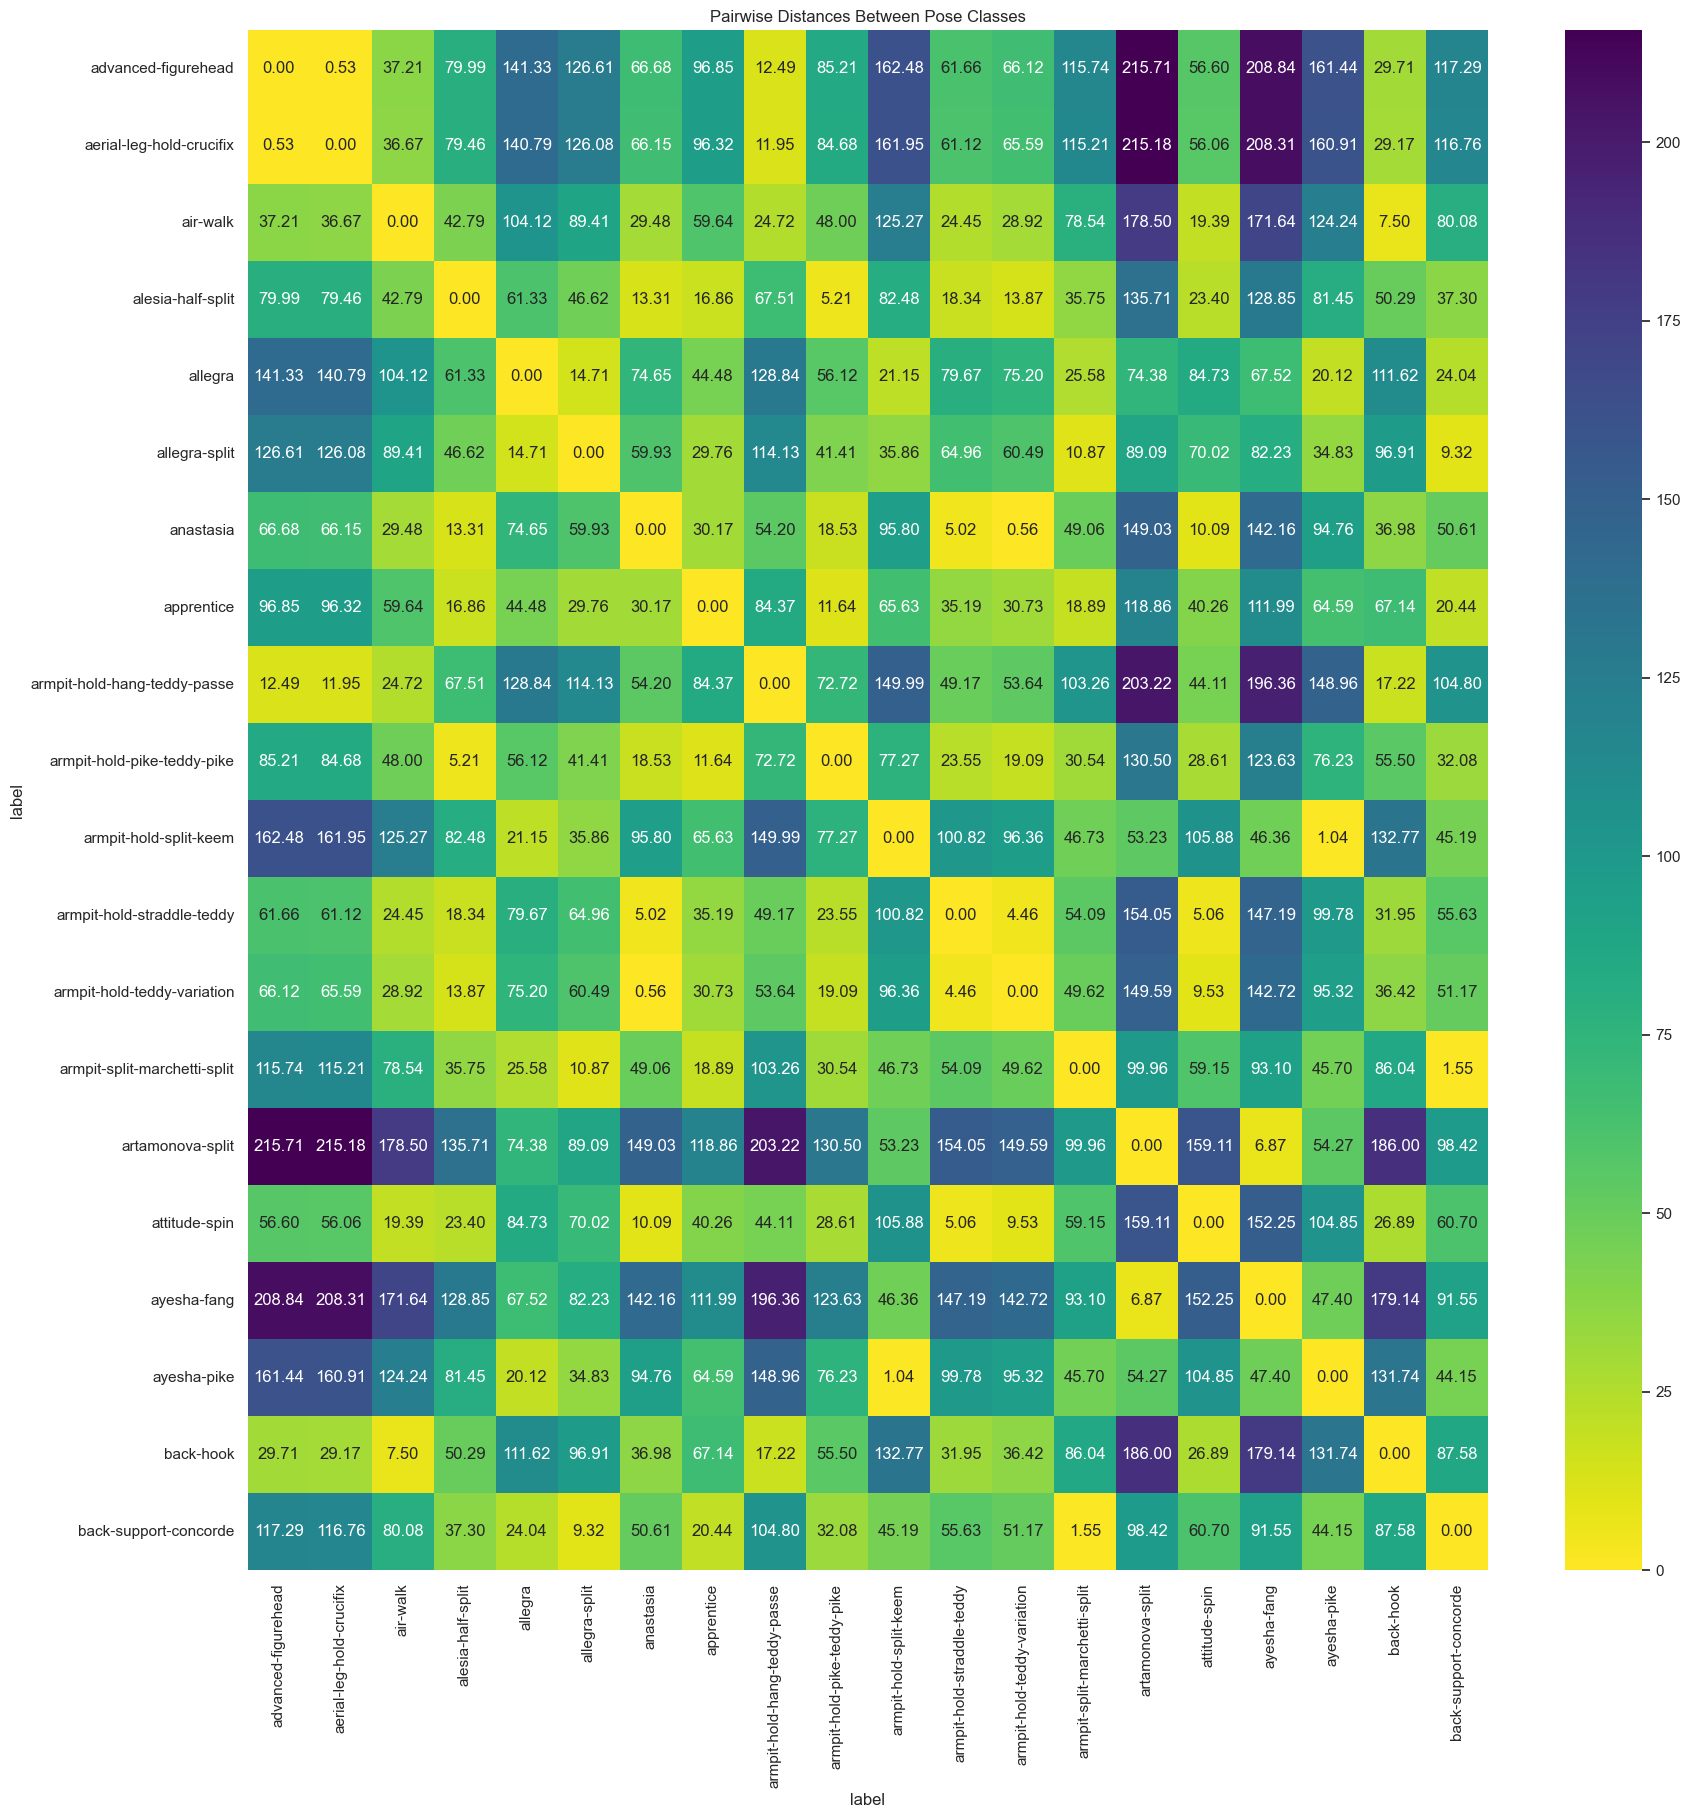

In [357]:
plt.figure(figsize=(20, 20))
sns.heatmap(distances.iloc[:20,:20], annot=True, fmt=".2f", cmap="viridis_r",
            xticklabels=distances.iloc[:20,:20], yticklabels=distances.iloc[:20,:20])
plt.title('Pairwise Distances Between Pose Classes')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Trial 3 Findings

- Cross-validation yielded higher accuracy with the selection of added features, suggesting that the feature design is effective for classification.
- The importance of dataset cleaning is underscored. To affirm pose closeness, poses must share similar characteristics (e.g., grip, leg position).
- Although class separability is noted among a smaller number of classes, they are still grouped together, indicating the need for additional features.
- For the subsequent trial, it is recommended to apply KNN on test data. This will evaluate the model's ability to generalize to both known and unknown classes effectively.
